In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
a1 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap1')
a2 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap2')
a3 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap3')
a4 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap4')
a5 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap5')
a6 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap6')
a7 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
a8 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap8')

In [3]:
a_total = np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8), axis=0)
a_total.shape

(12978, 780)

## Plot all essays from ASAP 1-8 (only SBert)

In [4]:
x_all = a_total[:,12:]
x_all.shape

(12978, 768)

In [5]:
len(a6)

1800

In [6]:
sc = np.zeros(12978)
sc[:1783] = 1
sc[1783:3583] = 2
sc[3583:5309] = 3
sc[5309:7081] = 4
sc[7081:8886] = 5
sc[8886:10686] = 6
sc[10686:12255] = 7
sc[12255:] = 8

In [7]:
x_all.shape

(12978, 768)

In [8]:
sc.shape

(12978,)

In [9]:
sc = list(map(int, sc))

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_all = tsne.fit_transform(x_all)

pca = PCA(n_components=2)
pca_result_all = pca.fit_transform(x_all)

data_all = pd.DataFrame()
data_all['tsne-2d-one'] = tsne_results_all[:,0]
data_all['tsne-2d-two'] = tsne_results_all[:,1]
data_all['pca-one'] = pca_result_all[:,0]
data_all['pca-two'] = pca_result_all[:,1]
data_all['dataset'] = sc

data_all

c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12978 samples in 0.028s...
[t-SNE] Computed neighbors for 12978 samples in 8.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12978
[t-SNE] Computed conditional probabilities for sample 2000 / 12978
[t-SNE] Computed conditional probabilities for sample 3000 / 12978
[t-SNE] Computed conditional probabilities for sample 4000 / 12978
[t-SNE] Computed conditional probabilities for sample 5000 / 12978
[t-SNE] Computed conditional probabilities for sample 6000 / 12978
[t-SNE] Computed conditional probabilities for sample 7000 / 12978
[t-SNE] Computed conditional probabilities for sample 8000 / 12978
[t-SNE] Computed conditional probabilities for sample 9000 / 12978
[t-SNE] Computed conditional probabilities for sample 10000 / 12978
[t-SNE] Computed conditional probabilities for sample 11000 / 12978
[t-SNE] Computed conditional probabilities for sample 12000 / 12978
[t-SNE] Computed conditional probabilities for sa

,tsne-2d-one,tsne-2d-two,pca-one,pca-two,dataset
0,-45.755520,-70.400665,-1.861563,-0.796475,1
1,-35.343239,-75.953659,-1.994642,0.154140,1
2,-39.141296,-70.935394,-0.618365,1.708624,1
3,-39.473213,-69.102570,-1.348694,0.138020,1
4,-34.347328,-65.788643,-2.295271,0.668213,1
...,...,...,...,...,...
12973,22.334164,-1.920756,-2.432514,-1.163378,8
12974,15.803896,-8.992012,-1.371861,0.692151,8
12975,19.060972,0.820046,-1.306465,-0.519115,8
12976,16.897732,-9.623490,-0.812866,0.980631,8


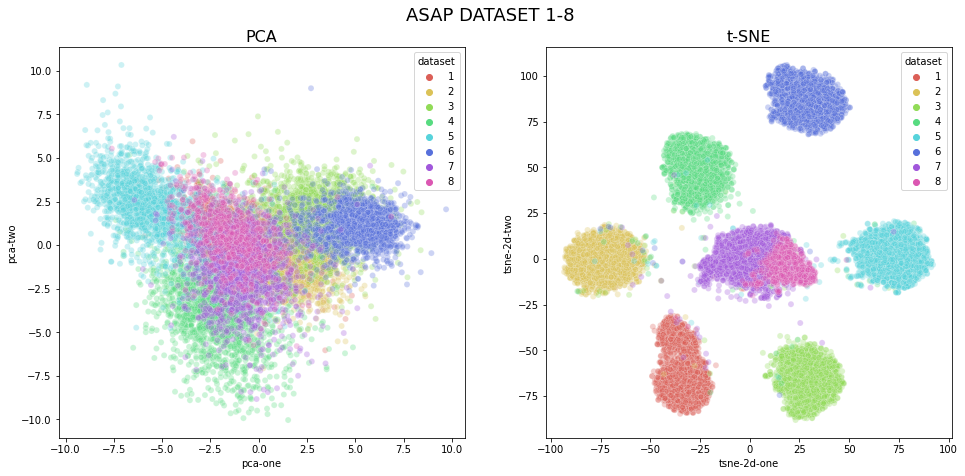

In [11]:
plt.figure(figsize=(16,7))

plt.suptitle("ASAP DATASET 1-8", size=18)
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA', size=16)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('t-SNE', size=16)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.subplots_adjust(top=0.9)

plt.savefig('pca_tsne_all.png', bbox_inches="tight")

## UMAP (Uniform Manifold Approximation and Projection)

In [12]:
import umap.umap_ as umap

reducer = umap.UMAP()

umap_results = reducer.fit_transform(x_all)

#umap_results

In [13]:
data_all['umap-2d-one'] = umap_results[:,0]
data_all['umap-2d-two'] = umap_results[:,1]

#data_all

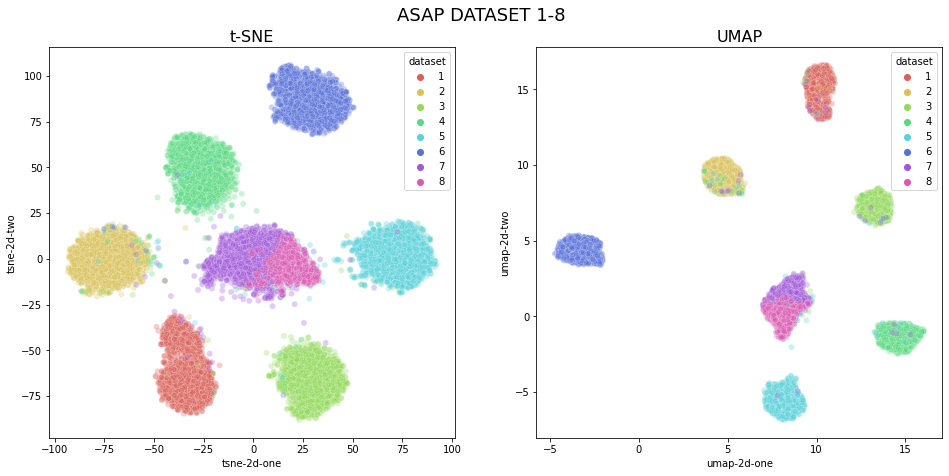

In [14]:
plt.figure(figsize=(16,7))

plt.suptitle("ASAP DATASET 1-8", size=18)
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('t-SNE', size=16)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('UMAP', size=16)
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.subplots_adjust(top=0.9)

plt.savefig('tsne_umap_all.png', bbox_inches="tight")

plt.show()

### Plot for Paraphrased ASAP 1,4,5,6,7

In [45]:
pa1 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_paraphrase_normalized_asap1')
pa4 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_paraphrase_normalized_asap4')
pa5 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_paraphrase_normalized_asap5')
pa6 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_paraphrase_normalized_asap6')
pa7 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_paraphrase_normalized_asap7')

In [81]:
a_par_total = np.concatenate((pa1,pa4,pa5,pa6,pa7,a7), axis=0)
a_par_total.shape

(10298, 780)

In [82]:
x_par_all = a_par_total[:,12:]
x_par_all.shape

(10298, 768)

In [48]:
len(pa1)

1783

In [50]:
len(pa4)

1772

In [51]:
len(pa5)

1805

In [52]:
len(pa6)

1800

In [53]:
len(pa7)

1569

In [75]:
sp = np.zeros(10298)
sp[:1783] = 1
sp[1783:] = 4
sp[3555:] = 5
sp[5360:] = 6
sp[7160:] = 7
sp[8729:] = 17

In [76]:
from collections import Counter
Counter(sp)

Counter({1.0: 1783, 4.0: 1772, 5.0: 1805, 6.0: 1800, 7.0: 1569, 17.0: 1569})

In [77]:
sp = list(map(int, sp))

In [85]:
data_par['dataset_par'] = sp

In [83]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_par = tsne.fit_transform(x_par_all)

pca = PCA(n_components=2)
pca_result_par = pca.fit_transform(x_par_all)

c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10298 samples in 0.001s...
[t-SNE] Computed neighbors for 10298 samples in 2.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10298
[t-SNE] Computed conditional probabilities for sample 2000 / 10298
[t-SNE] Computed conditional probabilities for sample 3000 / 10298
[t-SNE] Computed conditional probabilities for sample 4000 / 10298
[t-SNE] Computed conditional probabilities for sample 5000 / 10298
[t-SNE] Computed conditional probabilities for sample 6000 / 10298
[t-SNE] Computed conditional probabilities for sample 7000 / 10298
[t-SNE] Computed conditional probabilities for sample 8000 / 10298
[t-SNE] Computed conditional probabilities for sample 9000 / 10298
[t-SNE] Computed conditional probabilities for sample 10000 / 10298
[t-SNE] Computed conditional probabilities for sample 10298 / 10298
[t-SNE] Mean sigma: 1.620913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.397186
[t-SNE] KL

In [84]:
data_par = pd.DataFrame()
data_par['tsne-2d-one'] = tsne_results_par[:,0]
data_par['tsne-2d-two'] = tsne_results_par[:,1]
data_par['pca-one'] = pca_result_par[:,0]
data_par['pca-two'] = pca_result_par[:,1]
data_par

,tsne-2d-one,tsne-2d-two,pca-one,pca-two
0,-2.940762,-123.583733,0.021091,-0.145832
1,-13.543608,-125.204468,-0.232107,-0.944869
2,-8.995665,-112.750626,-0.398360,-2.383260
3,-13.977395,-112.129555,0.033303,-1.157036
4,-30.601315,-106.916687,-1.071878,-1.594620
...,...,...,...,...
10293,11.165242,-5.847090,-1.825915,2.047489
10294,12.157833,52.164005,-1.137115,3.240585
10295,-8.472187,21.827749,-0.068056,2.268854
10296,5.988001,-34.072742,0.286134,-0.191256


In [80]:
len(data_par)

8729

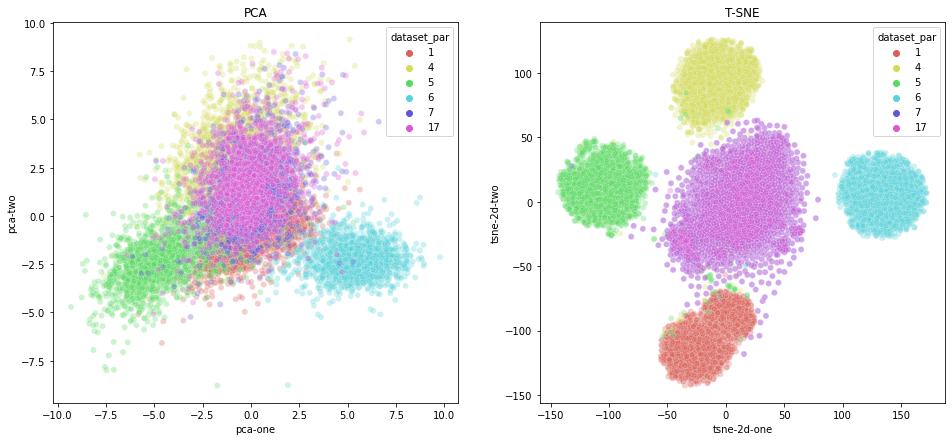

In [87]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="dataset_par",
    palette=sns.color_palette("hls", 6),
    data=data_par,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dataset_par",
    palette=sns.color_palette("hls", 6),
    data=data_par,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne_78.png', bbox_inches="tight")